In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/final_data (1).csv",encoding='ISO-8859-1', error_bad_lines=False, warn_bad_lines=False,engine="python")
df.shape

<ipython-input-2-1f0f1ac51d89>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/final_data (1).csv",encoding='ISO-8859-1', error_bad_lines=False, warn_bad_lines=False,engine="python")
<ipython-input-2-1f0f1ac51d89>:1: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/final_data (1).csv",encoding='ISO-8859-1', error_bad_lines=False, warn_bad_lines=False,engine="python")


(9767, 8)

In [3]:
df

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary
0,256a0dd8edfe03e0aa5c72a347651f4dff8068f3,10.3389/fnut.2021.727548,NaN,"In the past 50 years, the world has seen a dra...","Hoteit, Maha. Zoghbi, Edwina. Rady, Alissar...",Assessment of Industrially Produced Trans<br>...,Front Nutr,Not provided.
1,5c17eca0e4fc83d345681775fa41b57f1ca6c3be,10.1186/s13054-020-03136-6,NaN,ICU. The NuDesc score is approved and shows a ...,"JÃ¤ckel, Markus. Bemtgen, Xavier. <br>Wengen...",Is delirium a specific complication of viral<...,Crit Care,Not provided.
2,5203dba131399e2c7e7b98a57524d92d40648944,10.3389/fnut.2020.583080,NaN,"Since December 2019, the coronavirus disease (...","Tsoupras, Alexandros. Lordan, Ronan. <br>Zab...",Thrombosis and COVID-19: The Potential Role o...,Front Nutr,Not provided.
3,4ac2fe75e88e16b9d97c10f3a89e38f0b2c658ae,10.1530/ec-20-0567,Objective: COVID-19 in people with diabetes is...,People with diabetes are disproportionately af...,"Kempegowda, Punith. Melson, Eka. Johnson,<b...",Effect of COVID-19 on the clinical course of<...,Endocr Connect,Objective: COVID-19 in people with diabetes i...
4,2ed4902c047c625c9b2284d5cf239fe8695ff011,10.3201/eid2706.210135,NaN,T he government of South Korea has implemented...,"Yum, Sujin. Hong, Kwan. Sohn, Sangho. Kim,...",Trends in Viral Respiratory Infections During...,Emerg Infect Dis,Not provided.
...,...,...,...,...,...,...,...,...
9762,f828d0fa9173fd3066c87112c3ecfd7b5ed7fb0f,10.1016/j.amjcard.2020.06.007,NaN,due the positive intra-thoracic pressure. Also...,"FAYSSOIL, Abdallah. MUSTAFIC, Hazrije. <br>M...",The Right Ventricle in COVID-19 Patients,Am J Cardiol,Not provided.
9763,91a7a536d5979500c54ddf033751ad110399f649,10.1016/j.euroecorev.2021.103923,Mortality inequalities remain substantial in m...,Despite an unprecedented worldwide decline in ...,"Brandily, Paul. BrÃ©bion, ClÃ©ment. Briole,...",A poorly understood disease? The impact of<br...,Eur Econ Rev,Mortality inequalities remain substantial in<...
9764,d89d2a1f3ae7351ce389f65d0e3469ba92b65f8e,10.1101/2020.06.08.141309,Severe respiratory virus infections initiate a...,Severe viral pneumonia due to influenza A viru...,"Koch, Clarissa M. Anekalla, Kishore R. Hu,<...",Influenza-induced activation of recruited<br>...,bioRxiv,Severe respiratory virus infections initiate<...
9765,f9f0d3495e6f8f04b60c9e1cf9a3cf1423d51cc7,10.1186/s12889-019-6774-5,Background: The etiology of severe pneumonia i...,"Emerging or re-emerging infections, including ...","Bunthi, Charatdao. Baggett, Henry C.. <br>Gr...","Enhanced surveillance for severe pneumonia,<b...",BMC Public Health,Background: The etiology of severe pneumonia<...


In [4]:
df.isnull().sum()

paper_id               0
doi                 1255
abstract            3149
body_text           2479
authors             3149
title               3665
journal             4541
abstract_summary    4523
dtype: int64

In [5]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3478 entries, 3 to 9766
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   paper_id          3478 non-null   object
 1   doi               3478 non-null   object
 2   abstract          3478 non-null   object
 3   body_text         3478 non-null   object
 4   authors           3478 non-null   object
 5   title             3478 non-null   object
 6   journal           3478 non-null   object
 7   abstract_summary  3478 non-null   object
dtypes: object(8)
memory usage: 244.5+ KB


In [15]:
!pip install langdetect

In [16]:
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(df))):
    # split by space into list, take the first x intex, join with space
    text = df.iloc[ii]['body_text'].split(" ")

    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:

            try:
                # let's try to label it through the abstract then
                lang = detect(df.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass

    # get the language
    languages.append(lang)

100%|██████████| 184/184 [00:02<00:00, 82.49it/s]


In [17]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)

print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 184

{'ca': 2,
 'da': 1,
 'de': 1,
 'en': 168,
 'hr': 1,
 'id': 1,
 'it': 3,
 'lv': 1,
 'nl': 1,
 'pt': 1,
 'ro': 4}


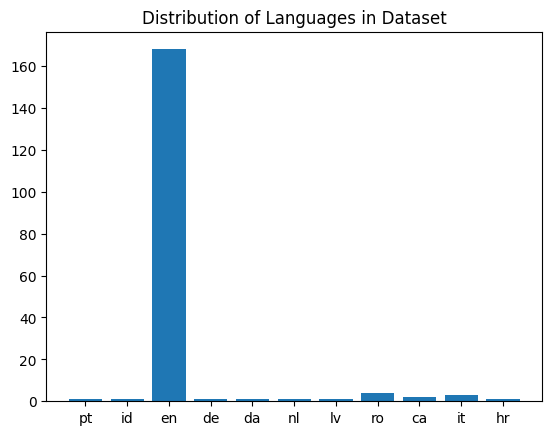

In [18]:
df['language'] = languages
plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.show()

In [19]:
df.shape

(184, 9)

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import json

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [21]:
df = df[df['language'] == 'en']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 3 to 1592
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   paper_id          168 non-null    object
 1   doi               168 non-null    object
 2   abstract          168 non-null    object
 3   body_text         168 non-null    object
 4   authors           168 non-null    object
 5   title             168 non-null    object
 6   journal           168 non-null    object
 7   abstract_summary  168 non-null    object
 8   language          168 non-null    object
dtypes: object(9)
memory usage: 13.1+ KB


In [22]:
df.shape

(168, 9)

In [28]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    # Define additional stop words
    additional_stopwords = ['ha', 'le', 'wa','doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure',
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.',
    'al.', 'Elsevier', 'PMC', 'CZI']

    # Remove HTML tags
    text = re.sub(r'<[^>]+>', ' ', text)

    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuation])

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove numerical values
    tokens = [word for word in tokens if not word.isdigit()]

    # Remove additional stop words
    tokens = [word for word in tokens if word not in additional_stopwords]

    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Sample text
sample_text = "Objective: COVID-19 in people with diabetes is<br>associated with a disproportionately worse prognosis.<br>DKA is an acute complication of diabetes with a<br>mortality rate of approximately 0.67%. Little is known<br>about the natural history of DKA in the presence of<br>COVID-19. This study aimed to explore the effects of<br>COVID-19 on presentation, clinical course and outcome<br>in patients presenting with DKA. Design:<br>Retrospective cohort study. Methods: All patients treated<br>for DKA between 1 March 2020 and 30 May 2020 were<br>included. Patients were categorised as COVID-positive<br>or COVID-negative based on the swab test. A<br>pre-COVID group was established using data..."

# Preprocess the sample text
preprocessed_sample_text = preprocess_text(sample_text)
print(preprocessed_sample_text)


objective covid19 in people with diabetes is associated with a disproportionately worse prognosis dka is an acute complication of diabetes with a mortality rate of approximately little is known about the natural history of dka in the presence of covid19 this study aimed to explore the effects of covid19 on presentation clinical course and outcome in patients presenting with dka design retrospective cohort study methods all patients treated for dka between march and may were included patients were categorised as covidpositive or covidnegative based on the swab test a precovid group was established data


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
import warnings

# Suppress warnings for FutureWarning about KMeans
warnings.filterwarnings("ignore", category=FutureWarning)

# Step 2: Vectorize Text Data
vectorizer = CountVectorizer(preprocessor=preprocess_text, stop_words='english')
X = vectorizer.fit_transform(df['abstract_summary'])

# Step 3: Train LDA Model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(X)

# Step 4: Get the Topic Distributions
topic_distribution = lda_model.transform(X)

# Step 5: Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(topic_distribution)

# Step 6: Assign Cluster Labels using .loc
df.loc[:, 'cluster'] = clusters

# Step 7: Get the Top Words for Each Topic
feature_names = vectorizer.get_feature_names_out()
n_top_words = 10

for topic_idx, topic in enumerate(lda_model.components_):
    top_word_index = topic.argsort()[-n_top_words:][0:5]  # Get the index of the top word
    top_word = feature_names[top_word_index]  # Get the top word
    print(f"Topic #{topic_idx + 1}: {top_word}")


Topic #1: ['function' 'acute' 'school' 'lung' 'data']
Topic #2: ['role' 'survival' 'recent' 'left' 'study']
Topic #3: ['shariah' 'eif3f' 'replication' 'associated' 'covid19']
Topic #4: ['igg' 'pathogens' 'critical' 'associated' 'laundering']
Topic #5: ['car' 'rescheduling' 'polymer' 'antibody' 'study']
Topic #6: ['disease' 'associations' 'patients' 'reported' 'covid19']
Topic #7: ['respiratory' 'covid19' 'vaccine' 'results' 'metastasis']
Topic #8: ['studies' 'respiratory' 'disease' 'affinity' 'background']
Topic #9: ['ehl' 'implementation' 'care' 'clinical' 'treatment']
Topic #10: ['analysis' 'sarscov2' 'treatment' 'study' 'sport']


<ipython-input-29-64793ba45299>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'cluster'] = clusters


In [30]:
df.value_counts("cluster")

cluster
0    124
1     22
2     22
dtype: int64

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import warnings

# Suppress warnings for FutureWarning about KMeans
warnings.filterwarnings("ignore", category=FutureWarning)

# Step 2: Vectorize Text Data
vectorizer = CountVectorizer(preprocessor=preprocess_text, stop_words='english')
X = vectorizer.fit_transform(df['abstract_summary'])

# Step 3: Train LSA Model
lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_model.fit(X)

# Step 4: Get the Topic Distributions
topic_distribution = lsa_model.transform(X)

# Step 5: Apply KMeans Clustering
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(topic_distribution)

# Step 6: Assign Cluster Labels using .loc
df.loc[:, 'lsa_cluster'] = clusters

# Step 7: Get the Top Words for Each Topic
feature_names = vectorizer.get_feature_names_out()
n_top_words = 10

for topic_idx, topic in enumerate(lsa_model.components_):
    top_word_index = topic.argsort()[-n_top_words:][0:5]  # Get the index of the top word
    top_word = feature_names[top_word_index]  # Get the top word
    print(f"Topic #{topic_idx + 1}: {top_word}")


Topic #1: ['methods' 'infection' 'coronavirus' 'clinical' 'data']
Topic #2: ['healthcare' 'community' 'pandemic' 'fellowship' 'fellows']
Topic #3: ['severe' 'new' 'current' 'community' 'coronavirus']
Topic #4: ['ec' 'funding' 'infection' 'respiratory' 'community']
Topic #5: ['methods' 'lung' 'shariah' 'distress' 'healthcare']
Topic #6: ['associated' 'evidence' 'data' 'support' 'clinical']
Topic #7: ['gc' 'replication' 'inflammatory' 'death' 'viral']
Topic #8: ['study' 'viral' 'eif3f' 'respiratory' 'atr']
Topic #9: ['resilience' 'respiratory' 'behaviors' 'healthcare' 'virus']
Topic #10: ['closure' 'communication' 'associated' 'bacterial' 'home']


<ipython-input-32-13bccd8ab011>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'lsa_cluster'] = clusters


In [33]:
df.value_counts("lsa_cluster")

lsa_cluster
9    98
1    15
6    11
0    10
5    10
2     8
3     8
7     4
4     2
8     2
dtype: int64

In [7]:
!pip install top2vec

In [20]:
pip install --upgrade tensorflow keras


In [25]:
import pandas as pd
import numpy as np
import string

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vs

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [28]:
pip install --upgrade tensorflow tensorflow-probability


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.23.0
    Uninstalling tensorflow-probability-0.23.0:
      Successfully uninstalled tensorflow-probability-0.23.0


In [29]:
from top2vec import Top2Vec

In [30]:
content = df.abstract_summary

In [31]:
docs = df.abstract_summary.tolist()
docs[0]

' Objective: COVID-19 in people with diabetes is<br>associated with a disproportionately worse prognosis.<br>DKA is an acute complication of diabetes with a<br>mortality rate of approximately 0.67%. Little is known<br>about the natural history of DKA in the presence of<br>COVID-19. This study aimed to explore the effects of<br>COVID-19 on presentation, clinical course and outcome<br>in patients presenting with DKA. Design:<br>Retrospective cohort study. Methods: All patients treated<br>for DKA between 1 March 2020 and 30 May 2020 were<br>included. Patients were categorised as COVID-positive<br>or COVID-negative based on the swab test. A<br>pre-COVID group was established using data...'

In [32]:
len(docs)

3478

In [33]:
len(content)

3478

In [34]:
pip install top2vec[sentence_encoders]


In [35]:
!pip install tensorflow
!pip install tensorflow_hub
!pip install tensorflow_text


In [36]:
model = Top2Vec(docs)

2024-03-19 17:31:12,459 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-03-19 17:31:14,826 - top2vec - INFO - Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
2024-03-19 17:31:23,715 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-03-19 17:32:42,938 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-03-19 17:33:12,118 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-03-19 17:33:12,263 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [37]:
from top2vec import Top2Vec

In [38]:
topic_sizes, topic_nums = model.get_topic_sizes()
print(topic_sizes)

[3221  257]


In [39]:
print(topic_nums)

[0 1]


In [41]:
topic_words, word_scores, topic_nums = model.get_topics(2)

In [42]:
for words, scores, num in zip(topic_words, word_scores, topic_nums):
  print(num)
  print(f"Words: {words}")

0
Words: ['diseases' 'coronavirus' 'pathogens' 'disease' 'hiv' 'vaccines'
 'epidemic' 'infectious' 'vaccination' 'viruses' 'interventions'
 'prevalence' 'illness' 'patients' 'viral' 'disorders' 'vaccine'
 'outbreak' 'syndrome' 'cases' 'antiviral' 'intervention' 'infections'
 'hospitals' 'morbidity' 'mortality' 'diagnosis' 'influenza' 'developed'
 'virus' 'genome' 'gene' 'severity' 'diagnostic' 'distribution'
 'interactions' 'cohort' 'infected' 'chronic' 'factors' 'symptoms' 'blood'
 'prevention' 'pneumonia' 'development' 'fever' 'pandemic' 'deaths'
 'hospitalized' 'cancer']
1
Words: ['citation' 'some' 'multiple' 'several' 'respectively' 'coronavirus'
 'types' 'type' 'other' 'species' 'https' 'many' 'factors' 'including'
 'viruses' 'individuals' 'al' 'various' 'cohort' 'following' 'inhibitors'
 'an' 'gene' 'such' 'de' 'genome' 'co' 'dose' 'humans' 'pathogens'
 'diseases' 'virus' 'rt' 'people' 'include' 'disease' 'literature'
 'methods' 'have' 'cov' 'those' 'vaccines' 'there' 'antiviral'

In [45]:
documents, document_scores, document_ids = model.search_documents_by_topic (topic_num=0, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
  print(f"Document: {doc_id}, Score: {score}")
  print("----------")
  print(doc)
  print("----------")
print()

Document: 3278, Score: 0.8147479295730591
----------
 ï· Cytokine release syndrome seems to play a<br>pivotal role in COVID-19 pathogenesis. ï· Tocilizumab<br>is one of the most promising drugs for COVID-19. ï·<br>Tocilizumab halved the mortality in critical patients<br>compared to standard of care. ï· A transient respiratory<br>function worsening is observed soon after<br>administration. ï· Severe infective complications are more<br>common than in rheumatologic setting.
Background.<br>As the novel SARS-CoV-2 pandemic occurred, no<br>specific treatment was yet available. Inflammatory<br>response secondary to viral infection might be the<br>driver of severe diseases.
We report the safety and<br>efficacy (in terms of overall survival and hospital<br>discharge) of the anti-IL6...
----------
Document: 1060, Score: 0.8102452754974365
----------
 The development of neutralizing antibodies<br>(NAbs) against severe acute respiratory syndrome<br>coronavirus 2 (SARS-CoV-2) following infecti

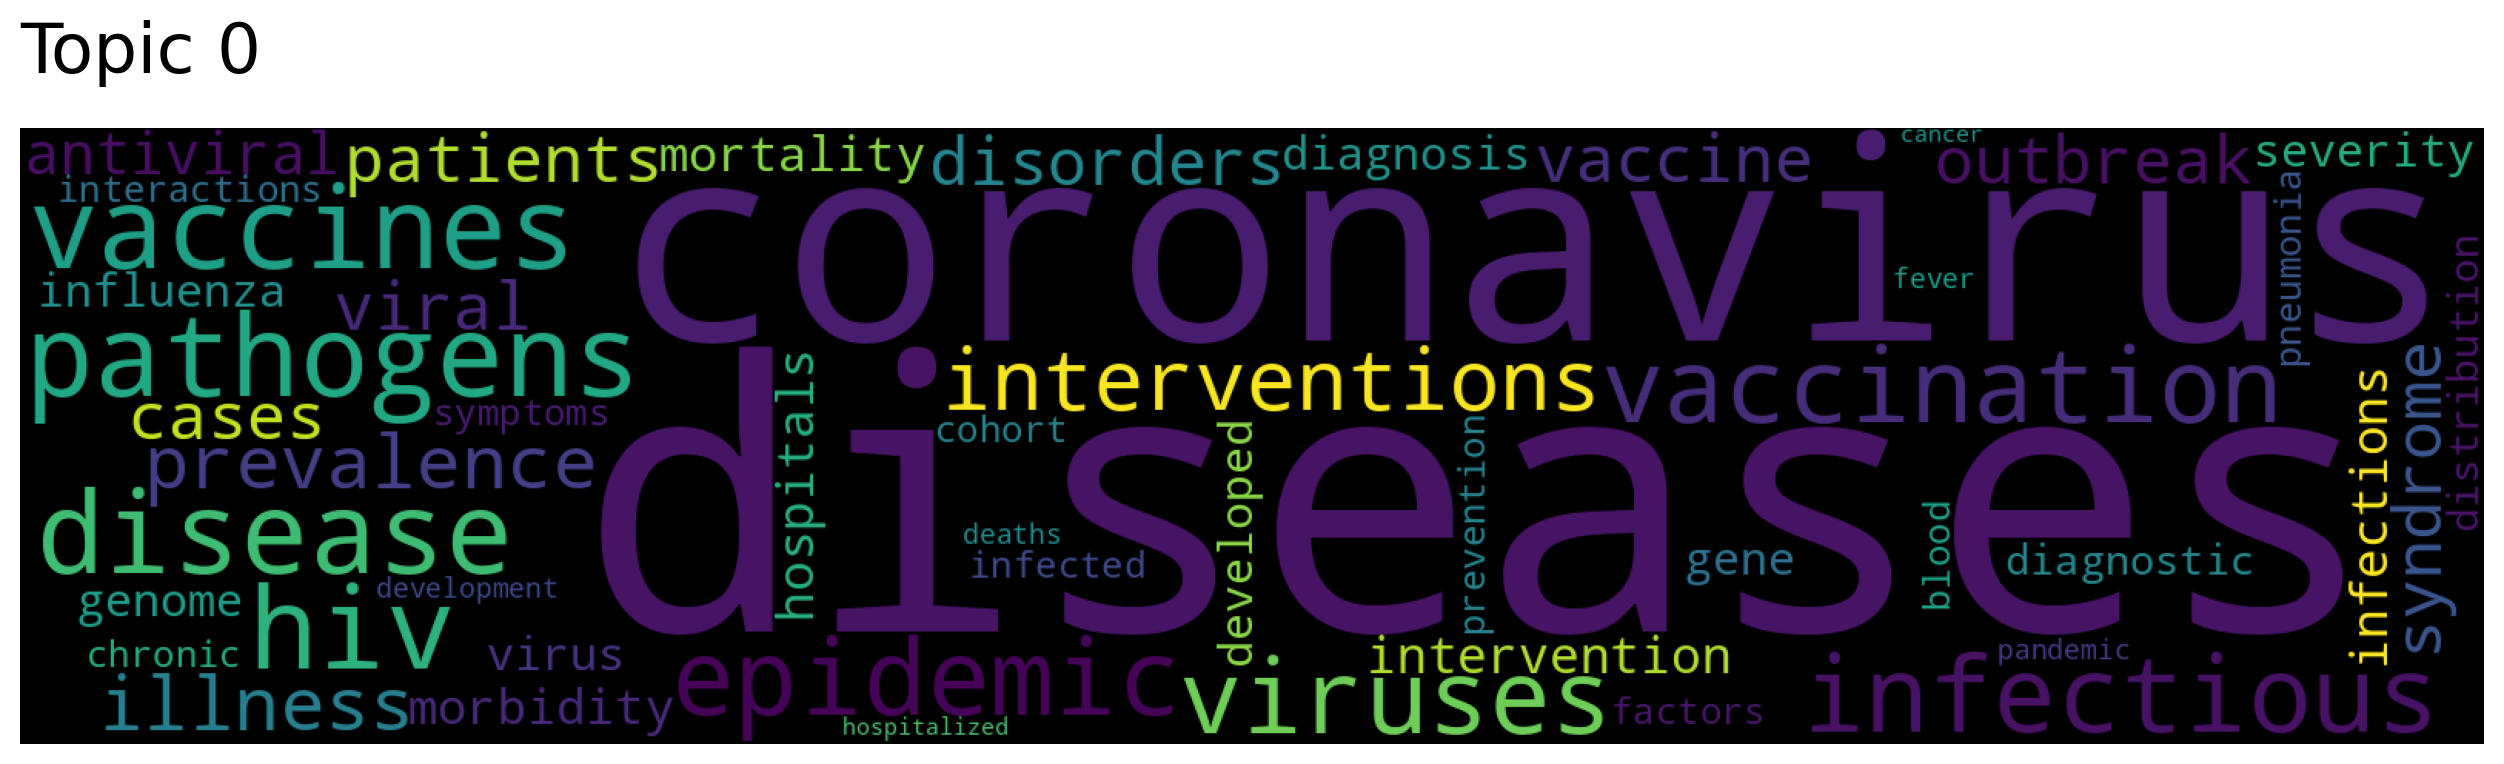

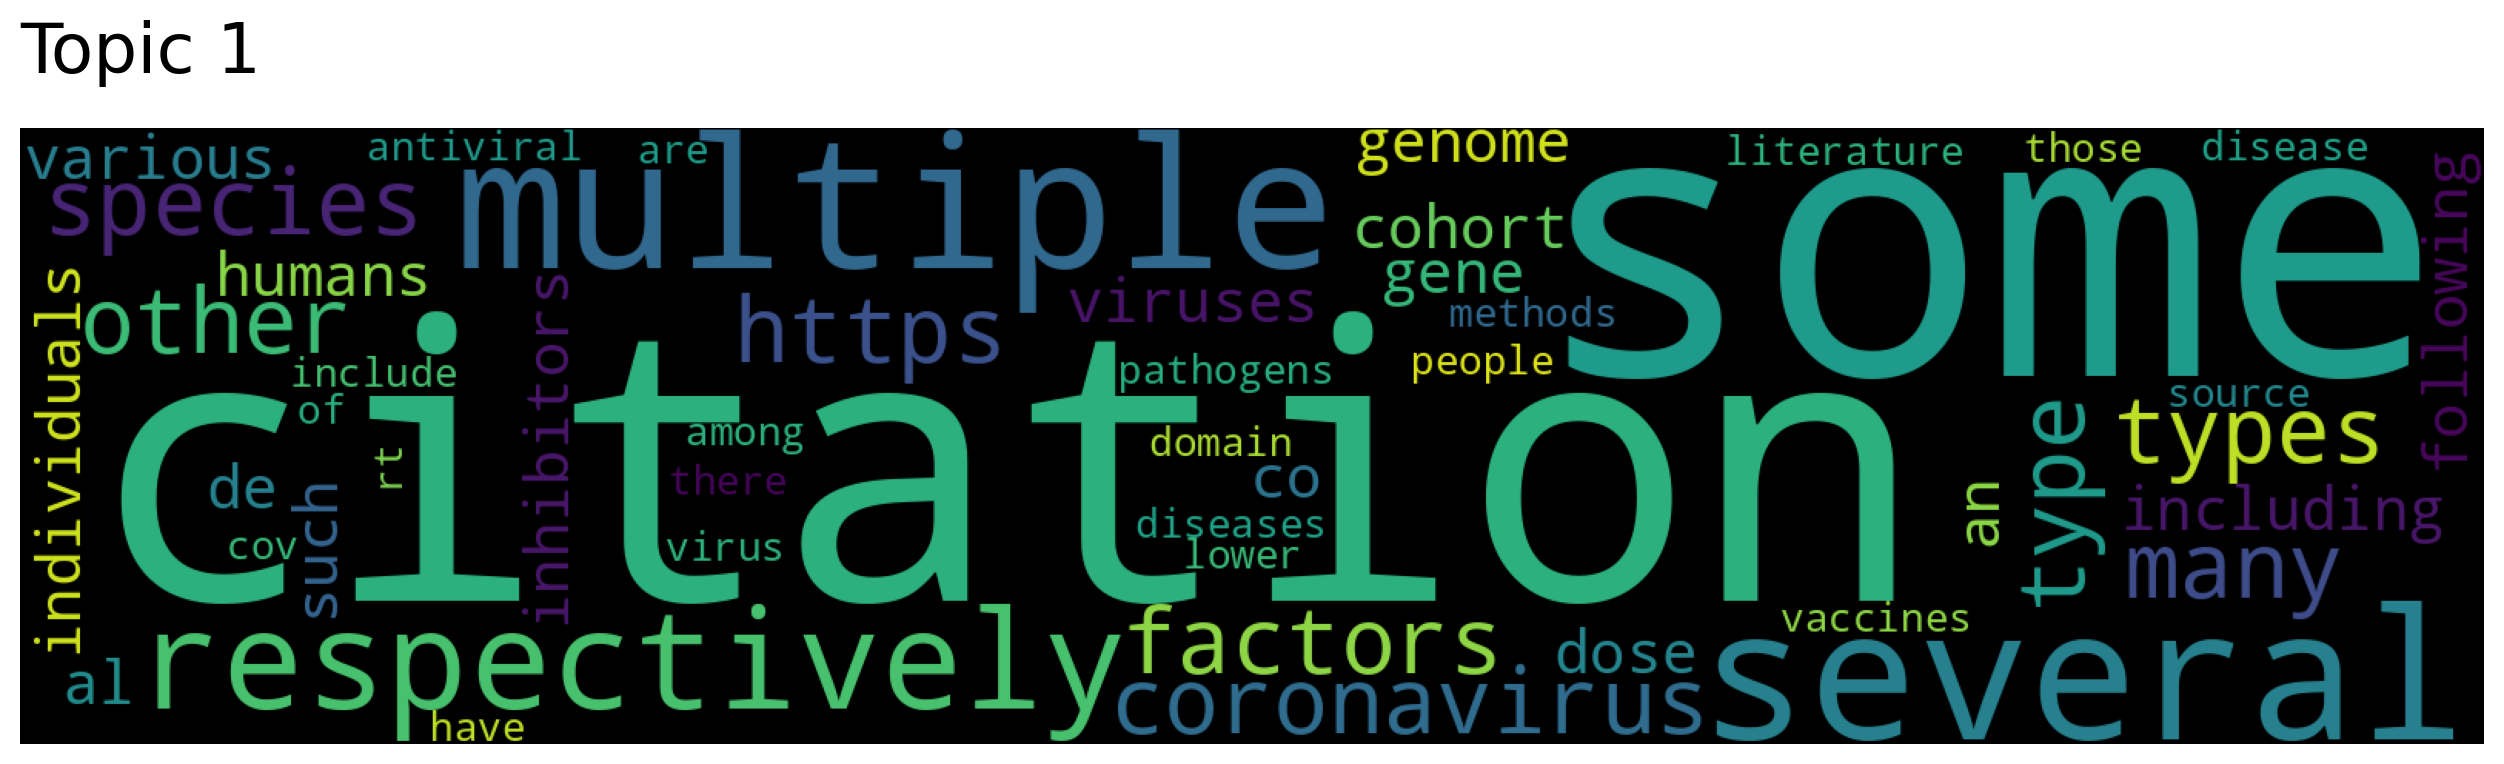

In [47]:
for topic in topic_nums[:2]:
    model.generate_topic_wordcloud(topic, background_color="black")

## Topic modelling using NMF

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(1,2))
tm = tfidf.fit_transform(df["abstract_summary"])

In [51]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=5, random_state=0)
nmf.fit(tm)

NMF(n_components=5, random_state=0)

In [52]:
for index,topic in enumerate(nmf.components_):
    print(f"The top 20 words for topic # {index}")
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-20:]])
    print("\n")

The top 20 words for topic # 0
['by', 'in the', 'we', 'of br', 'and br', 'are', 'on', 'as', 'this', 'that', 'for', 'of the', 'the br', 'is', 'in', 'to', 'and', 'of', 'the', 'br']


The top 20 words for topic # 1
['br al', 'et br', 'di', 'int', 'der', 'zhao', 'el', '2022', 'al br', 'de', '2021', 'https doi', 'doi', 'https', 'br et', 'et al', 'et', 'al', 'br', 'citation']


The top 20 words for topic # 2
['coronavirus sars', 'of sars', 'virus', 'protein', 'infection', 'respiratory syndrome', 'acute respiratory', 'severe acute', 'br sars', 'acute', 'of', 'syndrome', 'severe', 'the', 'respiratory', 'coronavirus', 'sars cov', 'sars', 'cov', 'br']


The top 20 words for topic # 3
['risk', 'during', 'study', 'br covid', 'pandemic', 'was', 'patients with', 'disease', 'to', 'in', 'of', 'the', 'with', 'were', 'and', 'patients', 'covid 19', '19', 'covid', 'br']


The top 20 words for topic # 4
['funded repositories', 'repositories such', 'free by', 'br permissions', '19 resource', 'and analyses',

In [53]:
topic_results = nmf.transform(tm)

In [54]:
topic_results.argmax(axis=1)

array([3, 0, 0, ..., 0, 0, 0])

In [55]:
df['Topic'] = topic_results.argmax(axis=1)

In [56]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

# Sample data (replace this with your actual DataFrame)
train_data = {
    'Sentences': [
        "'with', 'people', 'but', 'as', 'it is', 'on', 'have', 'be', 'this', 'for', 'they', 'in', 'not', 'that', 'it', 'of', 'and', 'to', 'is', 'the'",
        "'me', 'like', 'know', 'fucking', 'fuck', 'you have', 'you do', 'have', 'retarded', 'if', 'to', 'do not', 'if you', 'are you', 'not', 'do', 'your', 'you are', 'are', 'you'",
        "'smiling', 'joy rolling', 'on', 'on the', 'floor', 'the floor', 'rolling on', 'floor laughing', 'laughing', 'rolling', 'joy face', 'of', 'with', 'joy', 'of joy', 'tears', 'tears of', 'with tears', 'face with', 'face'",
        "'for', 'his', 'and', 'did', 'that what', 'it', 'the', 'she what', 'this', 'vagina', 'that', 'he what', 'please', 'her', 'it what', 'he', 'she', 'what slut', 'slut', 'what'",
        "'off', 'that nigger', 'fuck off', 'is nigger', 'nigger is', 'nigger faggot', 'fucking nigger', 'nigger lover', 'lover', 'he', 'white', 'nigger nigger', 'is', 'sand nigger', 'sand', 'the nigger', 'fucking', 'fuck', 'faggot', 'nigger'"
    ]
}

test_data = {
    'Sentences': docs
}

nmf_train_df = pd.DataFrame(train_data)
nmf_test_df = pd.DataFrame(test_data)

# Convert the text data to a matrix (e.g., using TF-IDF) based on the training data
vectorizer = TfidfVectorizer()
train_matrix = vectorizer.fit_transform(nmf_train_df['Sentences'])

# Apply NMF on the training data
num_topics = 5  # Number of topics obtained from NMF in the training phase
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_matrix = nmf_model.fit_transform(train_matrix)

# Transform the test sentences into the topic space
test_matrix = vectorizer.transform(nmf_test_df['Sentences'])
test_topic_weights = nmf_model.transform(test_matrix)

# Calculate cosine similarity with each topic
for topic_index in range(num_topics):
    topic_column_name = f"Similarity_Topic{topic_index}"
    topic_vector = nmf_matrix[:, topic_index].reshape(1, -1)
    similarity_scores = cosine_similarity(test_topic_weights, topic_vector)
    nmf_test_df[topic_column_name] = similarity_scores.flatten().round(4)

# Display the DataFrame with similarity scores
print("DataFrame with Similarity Scores:")
nmf_test_df


DataFrame with Similarity Scores:


,Sentences,Similarity_Topic0,Similarity_Topic1,Similarity_Topic2,Similarity_Topic3,Similarity_Topic4
0,Objective: COVID-19 in people with diabetes i...,0.8723,0.0000,0.4869,0.0000,0.0448
1,"Please cite this article as: I.L. Calandri,<b...",0.7270,0.0247,0.6813,0.0818,0.0000
2,Background: Media use may influence metabolic...,0.9474,0.0301,0.3116,0.0672,0.0000
3,Background: Vaccine hesitancy is a global<br>...,0.8492,0.0801,0.5163,0.0763,0.0067
4,"Citation: KolariÄ, A.; JukiÄ, M.; Bren, U.<...",0.7399,0.0573,0.6703,0.0000,0.0000
...,...,...,...,...,...,...
3473,J o u r n a l P r e -p r o o f ABSTRACT (250/...,0.9517,0.0000,0.1460,0.2702,0.0000
3474,Mortality inequalities remain substantial in<...,0.9441,0.0000,0.3209,0.0703,0.0278
3475,Severe respiratory virus infections initiate<...,0.9600,0.0635,0.2716,0.0254,0.0000
3476,Background: The etiology of severe pneumonia<...,0.9502,0.0109,0.3116,0.0000,0.0000


##Bert Topic

In [57]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [59]:
pip install --upgrade bertopic transformers tensorflow-probability


In [67]:
from bertopic import BERTopic

RuntimeError: Failed to import transformers.pipelines because of the following error (look up to see its traceback):
cannot import name 'FlatDirichlet' from 'tensorflow_probability.python.distributions.dirichlet' (/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/distributions/dirichlet.py)

In [ ]:
tweets = df.Content.to_list()
topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(tweets)

In [ ]:
topic_model.get_topic_info()

In [ ]:
topic_model.visualize_topics()